In [1]:
!pip install datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset


# Loading Dataset

data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()

#Data Clean Up
df.job_posted_date = pd.to_datetime(df.job_posted_date)

In [2]:
df.pivot_table(index='job_title_short',aggfunc='size')

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [10]:
df.pivot_table(index='job_title_short',values=['salary_year_avg','salary_hour_avg'],aggfunc='median')

,salary_hour_avg,salary_year_avg
job_title_short,,
Business Analyst,40.362499,85000.0
Cloud Engineer,40.000000,90000.0
Data Analyst,32.615002,90000.0
Data Engineer,58.500000,125000.0
Data Scientist,47.500000,127500.0
Machine Learning Engineer,47.535000,106415.0
Senior Data Analyst,47.500000,111175.0
Senior Data Engineer,61.500000,147500.0
Senior Data Scientist,47.620003,155500.0


In [20]:
df.groupby('job_title_short')[['salary_year_avg', 'salary_hour_avg']].median()


,salary_year_avg,salary_hour_avg
job_title_short,,
Business Analyst,85000.0,40.362499
Cloud Engineer,90000.0,40.000000
Data Analyst,90000.0,32.615002
Data Engineer,125000.0,58.500000
Data Scientist,127500.0,47.500000
Machine Learning Engineer,106415.0,47.535000
Senior Data Analyst,111175.0,47.500000
Senior Data Engineer,147500.0,61.500000
Senior Data Scientist,155500.0,47.620003


In [2]:
df.pivot_table(index='job_country',values=['salary_year_avg'],columns='job_title_short',aggfunc='median')

NameError: name 'df' is not defined

<Axes: xlabel='job_country'>

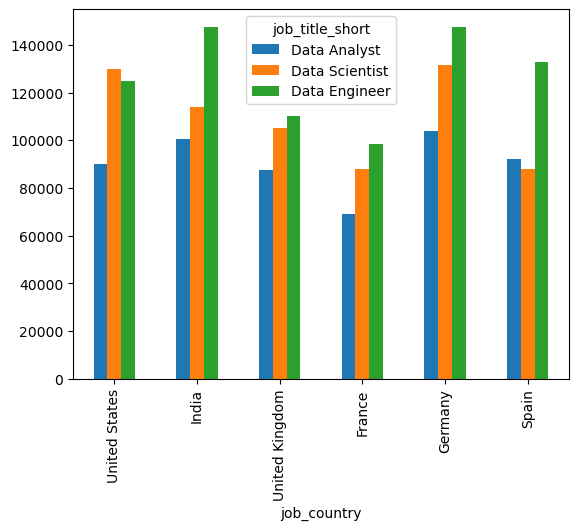

In [39]:
top_countries = df['job_country'].value_counts().head(6).index


df_jobsalary = df.pivot_table(
    index='job_country',
    values=['salary_year_avg'],
    columns='job_title_short',
    aggfunc='median')


df_jobsalary = df_jobsalary.loc[top_countries]

job_titles =['Data Analyst','Data Scientist','Data Engineer']

df_jobsalary = df_jobsalary['salary_year_avg'][job_titles]

df_jobsalary.plot(kind='bar')